# Exercise 2: Data mining Coursework

Select an application domain preferably related to your topic above. Pick a data set,
possibly available publicly (e.g. diabetes from the UC Irvine Machine Learning Repository)
use data mining (e.g. classification, clustering, association rules etc.) to extract knowledge
from it. You can use any tool you like (e.g. Weka, RapidMiner). Then go back to preprocess your data set, change algorithm, parameters etc. attempting to extract knowledge
out of your data. Describe the process and discuss the results. Which method was more
appropriate and why? Detail the algorithmic parameters you used, justify your choices, and
discuss the challenges you met and how you overcame these. 

**Dataset**
In this notebook we will use the public available dataset **seattle-weather.csv** file found on Kaggle. This dataset consists of approximately 1400 records and 6 features regarding weather parameters on Seattle City USA. The data corresponds to weather data regarding the years from 2012 to 2015. That makes it perfect for this academic exercise since a variety of models will be applied for **classification purposes** and the whole process as the exercise requires will be described thoroughly.

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed May  3 17:52:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1: Processing the dataset

Importing the dataset

In [3]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [4]:

uploaded = files.upload()

Saving seattle-weather.csv to seattle-weather.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['seattle-weather.csv']))
print(df)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [6]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
#check information of the dataset
#check if we have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
#check for null values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
#check some statistics
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


# Task 2: Feature engineering

In [10]:
#drop date feature
df_new = df.drop('date', axis=1)

In [11]:
df_new

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [12]:
#convert the date feature to a datetime type
df['date'] = pd.to_datetime(df['date'])

In [13]:
#check the year in the date feature
df['date'].dt.year.value_counts()

2012    366
2013    365
2014    365
2015    365
Name: date, dtype: int64

So, we can see from the above result that we have data from 2012 to 2015 taken every day each year.

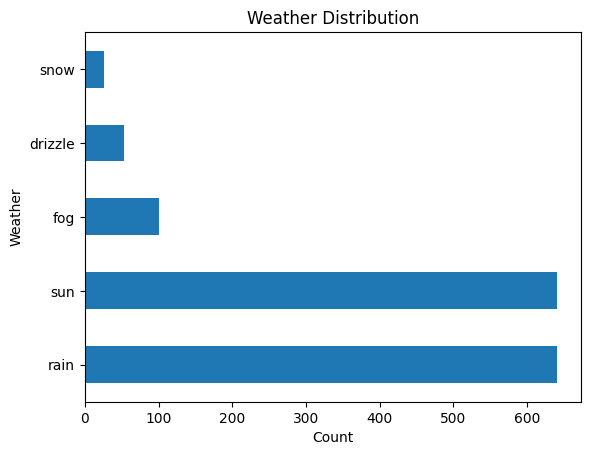

In [14]:
df_new['weather'].value_counts().plot.barh()
plt.title('Weather Distribution')
plt.xlabel('Count')
plt.ylabel('Weather')
plt.show()

In [15]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

From the above figure and table we can see that our dataset contains imballanced target feature. That is, we need to pay attention to this issue when applying algorithms in order to perform better results.

Managing the categorical label feature

In [16]:
df_new

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


In [17]:
# create LabelEncoder object
le = LabelEncoder()

# transform the last column of the copied dataframe
df_new['weather'] = le.fit_transform(df_new['weather'])

# print the transformed dataframe
df_new

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [18]:
#Seperating the dataset into X and Y variables
#X includes all the data except the target variable
#Y has only the target feature

X = df_new.drop('weather', axis=1)
y = df_new['weather']

In [19]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [20]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

So, now let's see how many values we have per class

In [21]:
y.value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

In [22]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

From the above information we can see firstly how the categories of our class attribute have been mapped to integers and secondly our minority classes are fog: 1, drizzle: 0 and snow: 3. Therefore, we will need a technique to address this problem in the following tasks.

In [23]:
X.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')

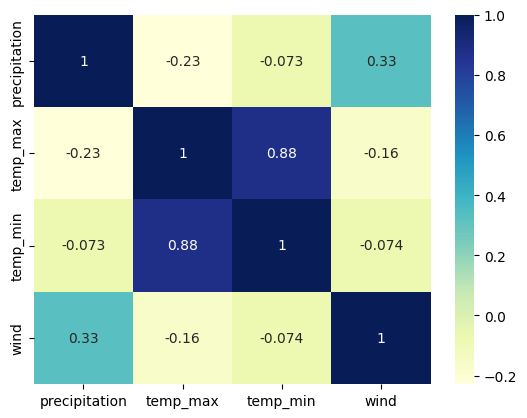

In [24]:
# calculate Pearson correlation coefficients
corr_matrix = X.corr()

# create heatmap
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
plt.show()

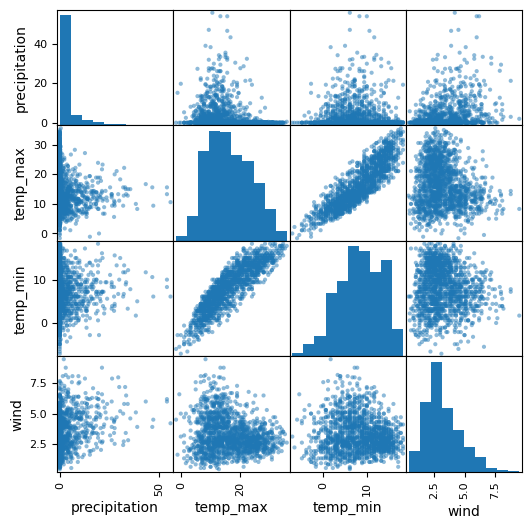

In [25]:
scatter_matrix(X, alpha=0.5, figsize=(6, 6))
plt.show()

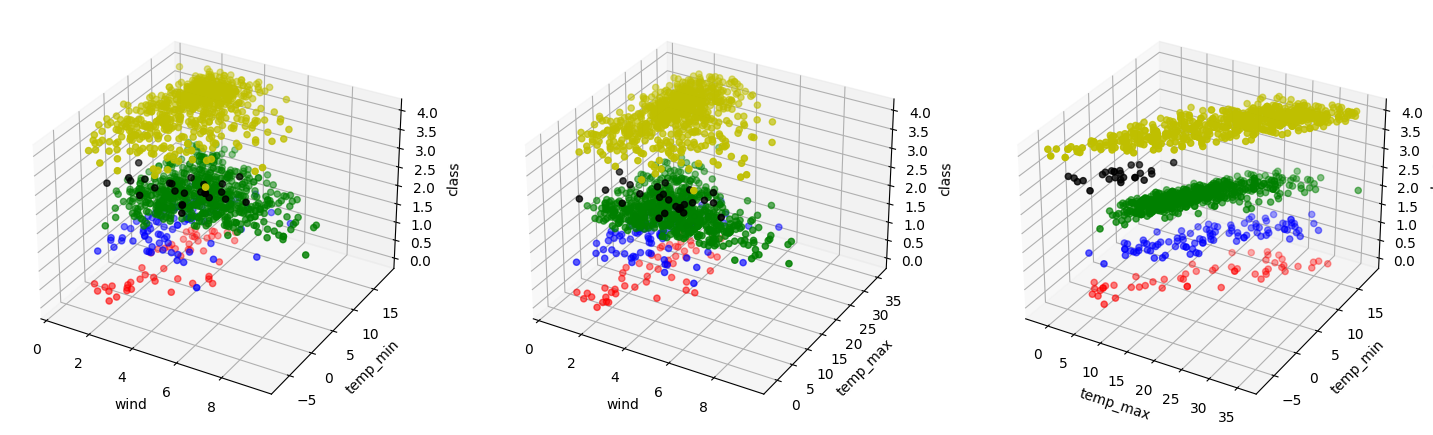

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 18))
colors = []
for i in y:
    if i == 0:
        colors.append('r')
    elif i == 1:
        colors.append('b')
    elif i == 2:
        colors.append('g')
    elif i == 3:
        colors.append('k')
    elif i == 4:
        colors.append('y')
    elif i == 5:
        colors.append('purple')
        
# Figure 1 (wind, temp_min, class)
# XYZ: Number of rows, number of columns, current figure
ax = fig.add_subplot(131, projection = '3d')
ax.scatter(df_new['wind'], df_new['temp_min'], y, c=colors)
ax.set_xlabel("wind")
ax.set_ylabel("temp_min")
ax.set_zlabel("class")

# Figure 2 (wind, temp_max, class)
ax = fig.add_subplot(132, projection = '3d')
ax.scatter(df_new['wind'], df_new['temp_max'], y, c=colors)
ax.set_xlabel("wind")
ax.set_ylabel("temp_max")
ax.set_zlabel("class")

# Figure 3 (temp_max, temp_min, class)
ax = fig.add_subplot(133, projection = '3d')
ax.scatter(df_new['temp_max'], df_new['temp_min'], y, c=colors)
ax.set_xlabel("temp_max")
ax.set_ylabel("temp_min")
ax.set_zlabel("class")




plt.show()

From the above three figures we can extract some information that will be usefull for later on with the goal to increase the performance of our models.
First of all, we can see a clear positive correlation between temperature max and temperature min. However, the features of wind and temp min or temp max attributes show a non correlation .



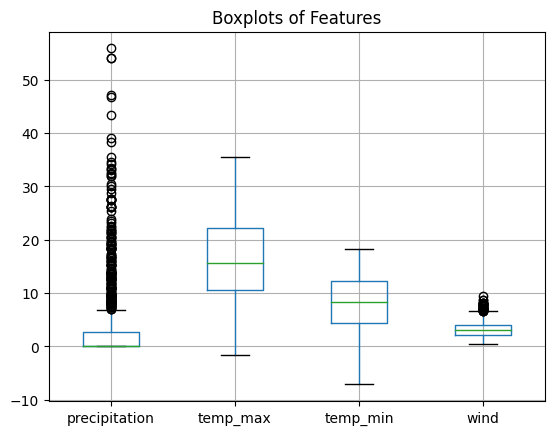

In [27]:
# Create a boxplot of the features
X.boxplot()

# Set the title of the plot
plt.title('Boxplots of Features')

# Show the plot
plt.show()

We can see from the above figure that the precipitation attribute has a significant amount of extreme values. The wind feature presents extreme values too. Thus, we need to take this into consideration when applying techniques aiming to improve the performance of the models. All in all, the features have values between approximately -5 and 40.

2.1. Application of algorithms
---



In this section, we will apply a variety of algorithms on **unstandardized data** and with **all features** keeping **imballanced our target class**.

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 57.2 KB


Firstly, we are going to apply a variety of models with naive parameters meaning the complexity of the models will be at low level. This is done since we are now exploring the dataset and we want to see how each of the algorithms react to the dataset.
Specifically:
*   **Logistic regression:** no use of any hyperparameter
*   **SVC:** just a linear kernel
*   **Perceptron:** no use of any hyperparameter
*   **MLP:** hidden layer with 50 neurons
*   **Decision Tree:** with a depth of 3 (shallow tree)
*   **Random Forest:** with 25 estimators and depth of 3

We will use a function that takes input and returns a classification report for each of the models specified. Since, we have 5 classes and our dataset is highly imballanced we are more interested in f1-score for each of the classes. That is, we need to have high f1-score for each class and not for a subset of our classes. In other words, our goal is to make a model to be able to predict every class even if the class is the minority of the dataset and as we have stated earlier the minority classes are 0, 1 and 3.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [30]:
#create a function that take the X and y train and test data and the parameters of each model.
#Then, it trains, tests and returns a classification report for each model

def run_classifiers(X_train, X_test, y_train, y_test, models_params={}):
    reports = {}
    for model, params in models_params.items():
        clf = model(**params)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred)
        reports[clf.__class__.__name__] = report
        
    return reports

In [31]:
#specify the models and the corresponding parameters
models_params_naive = {
    LogisticRegression: {'random_state':1},
    SVC: {'kernel': 'linear', 'random_state':1},
    Perceptron: {'random_state':1},
    MLPClassifier: {'hidden_layer_sizes': (50,), 'random_state':1},
    DecisionTreeClassifier: {'max_depth': 3, 'random_state': 1},
    RandomForestClassifier: {'n_estimators': 25, 'max_depth': 3, 'random_state': 1}
}

results_naive = run_classifiers(X_train, X_test, y_train, y_test, models_params_naive)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [32]:
#print each model and its classification report
for model_name, report in results_naive.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        30
           2       0.97      0.93      0.95       193
           3       0.67      0.25      0.36         8
           4       0.76      0.99      0.86       192

    accuracy                           0.85       439
   macro avg       0.48      0.43      0.43       439
weighted avg       0.77      0.85      0.80       439


SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        30
           2       0.98      0.91      0.95       193
           3       0.62      0.62      0.62         8
           4       0.76      1.00      0.86       192

    accuracy                           0.85       439
   macro avg       0.47      0.51      0.49       439
weighted avg       0.78      0.85      0.81       4

As an overall view, we can see that all models except Perceptron algorithm produced over 80% accuracy where Perceptron model slightly lower. However, we are not interested in the accuracy but in f1-score of each class. With that being said, the 0 and 1 classes have been totally misclassified. The MLP classifier does a pretty good job where it classifies the other 3 classes better than any other model.

Some of the reasons can be the following:
*   **Logistic Regression:** works good with multiclass classification problems, low risk of overfitting
*   **SVC:** can handle multiclass classification problems, can capture complex relationships through the use of different kernels, low risk of overfitting, good for small or medium-sized datasets
*   **Perceptron:** can handle noise datasets and if they are well linearly seperable
*   **MLPClassifier:** Can capture complex relationships
*   **DecisionTreeClassifier:** can capture nonlinear relationships, performs well on small and medium-sized datasets, low risk of overfitting
*   **RandomForestClassifier:** reduces the variance and overfitting of decision trees, can capture complex nonlinear relationships

However, there is room for improvement since we used only **naive hyperparameters** as it was stated in the beggining.

Some of the disadvantages that the selected models have are the following:
*   **Logistic Regression:** can underperform when there are complex nonlinear relationships, may suffer from multicollinearity when the input variables are highly correlated
*   **SVC:** requires careful tuning of hyperparameters and choice of kernel
*   **Perceptron:** not effective for capturing complex relationships
*   **MLPClassifier:** requires careful tuning of hyperparameters, sensitive to feature scaling
*   **DecisionTreeClassifier:** requires careful tuning of hyperparameters, sensitive to feature scaling, prone to overfitting if the network architecture is too complex
*   **RandomForestClassifier:** requires careful tuning of hyperparameters

From the above, we can conclude that some algorithms can underperform when they face complex non linear relationships such as Perceptron. Furthermore, we can say that logistic regression is not affective when the dataset has highly correlated features in our case there are two features meaning temperature max and temperature min that are highly correlated.

In addition, the other algorithms are prone to feature scaling. Most of the approaches require carefull tuning of hyperparameters and selection of features. Last but not least, the dataset characterizes of highly imballanced class attribute leading to the decrease of some of key evaluation metrics.

To overcome the above chalenges, firstly we will try to tune efficiently the hyperparameters of the selected models since this is a vital process when dealing with a dataset. There is no golden rule of picking one algorithm and performing better from others on every dataset given. That is why, we use a variety of models and different hyperparameters as the next cell block shows. In the next step, we will encounter some techniques that help to increase the performance of the models.

2.2. Fine tuning the hyperparameteres
---

*   **LogisticRegression:** the `C` is set to `2000` which controls the regularization strength. The `max_iter` hyperparameter is set to `5000` since it did not converged in the previous run of the algorithm. This allows the optimization algorithm to run during the training process. This can be helpful in improving the accuracy of the model by allowing it to learn more complex patterns in the data
*   **SVC:** the `kernel` is set to `rbf` since it is more flexible kernel and can handle non-linear boundaries better than the linear kernel. In our case, we have seen earlier that we have non-linear patterns for example between the attributes wind and temp_min or temp_max. In addition, `C` hyperparameter is set with a value of `2000`. When this value increases the model is more rigid meaning it does not allow the training data to be wrong classified. The `gamma` hyperparameter with a value of `0.000001` which cotrols the kernel coeffiecient. A low value of gamma results in a more flexible model since it creates a smoother decision boundary
*   **Perceptron:** added the `penalty` hyperparameter with a value of `l1` and the `alpha` hyperparameter to a value of `0.01`. The `max_iter` hyperparameter is set to `5000` too since this will allow the algorithm to explore more of the parameter space and find a better solution. The `shuffle` parameter is enabled to shuffle the training data before each epoch. It is useful to shuffle the data in order to prevent the model from overfitting and to improve the generalization of the model
*   **MLPClassifier:** the `activation` function is set to `relu` which is a commonly used activation function that helps improve the performance of the MLP algorithm. Also, `adam` is an adaptive learning rate optimization algorithm that can help speed up convergence, improve performance and is less sensitive to the choice of the hyperparameters. We increased the number of `hidden layers and neurons` to improve the model's ability to capture complex patterns in the dataset. The `alpha` hyperparamenter is set to `0.001` and the `learning rate` which controls how fast the model learns its value is set to `0.01`. The `max_iter` hyperparameter is `2000`. That is, the neural network has the ability to train for longer and potentially learn more complex features. Here the `shuffle` parameter is also used as in the case of Perceptron in order to prevent overfitting and generatilize better the performance of the model. In addition, the `max_iter` hyperparameter is used with a value of `500`.
*   **DecisionTreeClassifier:** The `criterion` of split is set to `entropy` that is the information gain. Preferably, here it would be a good choice to select the gain_ratio. However, it is not supported by the scikit learn library. We changed the default value that was 'gini' since this setting has difficulty when the number of classes is large. The `max depth` of the tree is increased to `6` in order to build a deeper tree and capture more complex patterns as we show that exists in our dataset. Furthermore, the `minimum samples split` as set to `2`
*   **RandomForectClassifier:** As with the dicision tree we specified for the `criterion` hyperparameter the value `entropy` since this setting tends to produce more balanced trees. Also, we increased the `n_estimators` hyperparameter to `100`, which increases the number of trees in the forest to improve the model's ability to generalize to new data. In addition, the `max_depth` meaning the depth of the trees are getting to be deeper and capture more complex patterns in the data, and added the `min_samples_split` hyperparameter with a default value of `2`

In [33]:
models_params_complex = {
    LogisticRegression: {'C': 2000, 'max_iter': 5000, 'random_state':1},
    SVC: {'kernel': 'rbf', 'C': 2000, 'gamma': 0.000001, 'random_state':1},
    Perceptron: {'penalty': 'l1', 'alpha': 0.01, 'random_state':1,'shuffle': True, 'max_iter': 5000},
    MLPClassifier: {'activation': 'relu', 'solver': 'adam', 'hidden_layer_sizes': (50, 100, 50), 'batch_size':40, 'shuffle': True, 'alpha': 0.001, 'learning_rate_init': 0.01, 'random_state':1, 'max_iter': 2000},
    DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2, 'random_state': 1},
    RandomForestClassifier: {'criterion': 'entropy', 'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'random_state': 1}
}

In [34]:
results_complex = run_classifiers(X_train, X_test, y_train, y_test, models_params_complex)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [35]:
#print each model and its classification report
for model_name, report in results_complex.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        30
           2       0.97      0.93      0.95       193
           3       0.67      0.25      0.36         8
           4       0.76      0.99      0.86       192

    accuracy                           0.85       439
   macro avg       0.48      0.43      0.43       439
weighted avg       0.77      0.85      0.80       439


SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        30
           2       0.95      0.76      0.84       193
           3       0.00      0.00      0.00         8
           4       0.68      1.00      0.81       192

    accuracy                           0.77       439
   macro avg       0.32      0.35      0.33       439
weighted avg       0.71      0.77      0.72       4

From the above results, we can conclude the following:
*   **the logistic regression** do not change its performance at all. This is due to that the dataset is simple in terms of records and features and this algorithm converged to the optimal it could find
*   **the svc** model decreased its performance a lot. This can be due to a variety of reasons such as the kernel or C or gamma selection. Maybe if altering the gamma hyperparameter and making it more strict it can help increase the performance
*   **the perceptron** decreased its performance. This model stills misclassifies three classes even when using complex and naive settings. The alpha parameter can be tested through a variety of range values in order the optimal to be found
*   **the mlpclassifier** method, stays approximately to the same level since there are some metrics that increased whereas some other quantitative indicators decreased in comparison to the naive approach tested previously. However, the f1-score for the class 3 has been decreased when using complex hyperparameters.
*   **the decisiontreeclassifier** approach resulted approximately to the same results as with the naive method. However, when using complex settings the f1-score for the class 3 have been increased.
*   **the randomforestclassifier** algorithm led to slightly better results for the f1-score metric especially for the class 0, 1 and 3. In this case, we used 100 estimators and when the trees combined resulted to better results than the previous where we used only 25 trees

All in all, we can see that RandomForestClassifier is the model that achieves the best performance out of the 5 selected complex with hyperparameters algorithms. In other words, this model classifies is the only model that have f1-score for each of the 5 classes. We could say that second comes both DecisionTreeClassifier, MLP Classifier and Logistic Regression with minor differences between their metrics values. Both of these models capture the 3 out of the 5 classes. SVC and Perceptron fail to capture 3 classes.

To conclude, when using naive settings we had the MLP model where it captured 3 out of 5 classes. On the other hand, when we used more complex hyperparameters we saw that the Random Forest Classifier did a good job capturing 5 out of 5 classes although the f1-score was low in some classes.

# Task 3: Handling the imballanced class issue

Since, our biggest problem is that our models misclassify the classes especially the minority ones we are going to solve the imballanced class issue in this task and then apply again the naive and complex hyperparameters again and compare the models and the approaches again.

To handle this imballanced issue, there is a variety of approaches one can use for example undersampling the majority class or oversampling the minority class. However, here we are going to use the Synthetic Minority Oversampling Technique aka SMOTE which creates synthetic data points based on the original data points. The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.

SMOTE Application
---


We can see from the below cells that we have 3 classes that are minority meaning class 0, 1 and 3. We are going to perform 3 times the SMOTE algorithm each time for a different minority class.

In [36]:
y.value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

In [37]:
#create the smote object and fit the X and y variables
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [38]:
y_sm.value_counts()

2    641
3    641
4    640
1    101
0     53
Name: weather, dtype: int64

From the above example we can see that the minority class where it was class 3 now it has 641 samples the same number as the majority class. We are going to perform this exactly operation two more times for the two remaing minority classes one at a time.

In [39]:
#create the smote object and fit the X_sm and y_sm variables
smote = SMOTE(sampling_strategy='minority')
X_sm2, y_sm2 = smote.fit_resample(X_sm,y_sm)

In [40]:
y_sm2.value_counts()

0    641
2    641
3    641
4    640
1    101
Name: weather, dtype: int64

In [41]:
#create the smote object and fit the X_sm2 and y_sm2 variables
smote = SMOTE(sampling_strategy='minority')
X_sm3, y_sm3 = smote.fit_resample(X_sm2,y_sm2)

In [42]:
y_sm3.value_counts()

0    641
2    641
3    641
1    641
4    640
Name: weather, dtype: int64

In [43]:
#dataset after applying the SMOTE operation 3 times
X_sm3.shape, y_sm3.shape

((3204, 4), (3204,))

In [44]:
#dataset without applying the SMOTE operation
X.shape, y.shape

((1461, 4), (1461,))

Naive settings on ballanced dataset
---



Let's now apply the models again using firstly the naive hyperparameters and then the complex ones and see if we have increased the performance of the models meaning if the models now capture all the classes and with high f1-score.

In [45]:
#pass the new X_sm3 and y_sm3
X_train, X_test, y_train, y_test = train_test_split(X_sm3, y_sm3, test_size=0.3, random_state=1, stratify=y_sm3)

In [46]:
X_train.shape

(2242, 4)

In [47]:
y_train.value_counts()

3    449
2    449
4    448
0    448
1    448
Name: weather, dtype: int64

In [48]:
X_test.shape

(962, 4)

In [49]:
y_test.value_counts()

1    193
0    193
3    192
2    192
4    192
Name: weather, dtype: int64

In [50]:
results_naive_sm = run_classifiers(X_train, X_test, y_train, y_test, models_params_naive)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
#print each model and its classification report
for model_name, report in results_naive_sm.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       193
           1       0.39      0.29      0.33       193
           2       0.93      0.85      0.89       192
           3       0.91      0.94      0.93       192
           4       0.46      0.57      0.51       192

    accuracy                           0.62       962
   macro avg       0.62      0.62      0.62       962
weighted avg       0.62      0.62      0.62       962


SVC:
              precision    recall  f1-score   support

           0       0.43      0.41      0.42       193
           1       0.42      0.34      0.38       193
           2       0.91      0.88      0.89       192
           3       0.93      0.92      0.92       192
           4       0.47      0.60      0.52       192

    accuracy                           0.63       962
   macro avg       0.63      0.63      0.63       962
weighted avg       0.63      0.63      0.63       9

From the above results, we can now say that all models capture all of the 5 classes. Some f1-scores are high some others are low. It is important to be mentioned here that although the accuracy of the 5 models has been dropped the models can now capture all classes. We care only about the f1-score of each class. The MLP classifier performs the best our of the 5 models. Then comes the RandomForest classifier and third the Decision Tree with small flunctuations between the previous referred model.

Complex settings on ballanced dataset
---


Let's use the complex hyperparameters.

In [52]:
results_complex_sm = run_classifiers(X_train, X_test, y_train, y_test, models_params_complex)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
#print each model and its classification report
for model_name, report in results_complex_sm.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       193
           1       0.41      0.32      0.36       193
           2       0.92      0.87      0.89       192
           3       0.92      0.92      0.92       192
           4       0.46      0.58      0.52       192

    accuracy                           0.62       962
   macro avg       0.62      0.62      0.62       962
weighted avg       0.62      0.62      0.62       962


SVC:
              precision    recall  f1-score   support

           0       0.37      0.42      0.40       193
           1       0.37      0.33      0.35       193
           2       0.94      0.65      0.77       192
           3       0.92      0.89      0.90       192
           4       0.43      0.57      0.49       192

    accuracy                           0.57       962
   macro avg       0.61      0.57      0.58       962
weighted avg       0.61      0.57      0.58       9

Using the complex hyperparameters we can actually see that Random Forest classifier performs extraordinary good with 82% weighted avg. All the models now capture all the 5 classes except Perceptron algorithm where it misclassifies an entirely class meaning class 0. Second method comes MLP classifier where it achieves 70% accuracy.

It is important to make a comparison between the naive and complex hyperparameters here. When using the complex settings we achieve 82% accuracy classifying all classes using Random Forest classifier. This classifier achieves almost 70% accuracy with the naive hyperparameters. 

# Task 4: Feature Scaling

In this stage, we are going to standardize our dataset since its values are not quite in the same scale. A variety of algorithms require feature scaling for optimal performance, while others are relatively insensitive to it. The following methods are sensitive to feature scaling:

*   LogisticRegression
*   SVC
*   Perceptron
*   MLPClassifier

On the other hand, the following algorithms are less sensitive to feature scaling:

*   DecisionTreeClassifier
*   RandomForestClassifier

It is always a good practice to perform feature scaling on the data before training a machine learning model, regardless of whether or not the algorithm is sensitive to it.

However, there may be cases where standardization could negatively impact the performance of your machine learning model. That is why, one should experiment with different feature scaling techniques and evaluate their impact on the performance of the models on the specific dataset.

Below two features scaling techniques are presented. Firstly, we will perform **standardization** and evaluate the models. Then, we will use another technique called **normalization** and evaluate again the models. We will test the performance of the models using the hyperparameters both from the naive and complex approaches. Therefore, in the end we will compare if the two feature scaling techniques have a singificant role in this dataset or not.

In [54]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Standardization - Naive settings
---


Firstly, we will try to use the same hyperparameters as used before when we tried the naive approach.

In [55]:
results_naive_sm_std = run_classifiers(X_train_std, X_test_std, y_train, y_test, models_params_naive)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
#print each model and its classification report
for model_name, report in results_naive_sm_std.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.40      0.43      0.41       193
           1       0.39      0.31      0.34       193
           2       0.89      0.73      0.80       192
           3       0.89      0.91      0.90       192
           4       0.45      0.57      0.50       192

    accuracy                           0.59       962
   macro avg       0.60      0.59      0.59       962
weighted avg       0.60      0.59      0.59       962


SVC:
              precision    recall  f1-score   support

           0       0.41      0.40      0.41       193
           1       0.40      0.35      0.37       193
           2       0.89      0.74      0.81       192
           3       0.91      0.86      0.89       192
           4       0.44      0.60      0.51       192

    accuracy                           0.59       962
   macro avg       0.61      0.59      0.60       962
weighted avg       0.61      0.59      0.60       9

We can see from the above results that Logistic Regression decreased its performance. SVC remained to the same level as without using standardization. Perceptron, again, misclassifies an entirely class as before. DecisionTreeClassifier and RandomForestClassifier performed exactly the same. As it was stated previously these two algorithms are insensitive to feature scaling. The best performance comes from MLP Classifier. All in all, we can conclude that standardization does not help with this dataset when using naive hyperparameters.

Standardization - Complex settings
---


Below, we used the more complex settings of the hyperparameters and tested the models on the standardized data.

In [57]:
results_complex_sm_std = run_classifiers(X_train_std, X_test_std, y_train, y_test, models_params_complex)

In [58]:
#print each model and its classification report
for model_name, report in results_complex_sm_std.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       193
           1       0.41      0.32      0.36       193
           2       0.92      0.87      0.89       192
           3       0.92      0.92      0.92       192
           4       0.46      0.58      0.52       192

    accuracy                           0.62       962
   macro avg       0.62      0.62      0.62       962
weighted avg       0.62      0.62      0.62       962


SVC:
              precision    recall  f1-score   support

           0       0.32      0.46      0.38       193
           1       0.42      0.24      0.31       193
           2       0.88      0.42      0.57       192
           3       0.80      0.86      0.83       192
           4       0.42      0.60      0.49       192

    accuracy                           0.52       962
   macro avg       0.57      0.52      0.52       962
weighted avg       0.57      0.52      0.52       9

We can see from the above results that Logistic Regression, Decision Tree and Random Forest classifiers do not alter perfomance. SVC slightly decreases its performance. Perceptron again misclassifies an entirely class.

The Random Forest classifier and then MLP classifier are the two models that perform better using the complex settings compare to using naive hyperparameters.

Normalization - Naive settings
---

Below, we perform normalization to the dataset first using the naive hyperparameters and test the models performance.


In [59]:
# MinMax Normalization
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [60]:
results_naive_sm_norm = run_classifiers(X_train_norm, X_test_norm, y_train, y_test, models_params_naive)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

In [61]:
#print each model and its classification report
for model_name, report in results_naive_sm_norm.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35       193
           1       0.37      0.24      0.29       193
           2       0.79      0.65      0.71       192
           3       0.79      0.96      0.87       192
           4       0.44      0.54      0.48       192

    accuracy                           0.55       962
   macro avg       0.54      0.55      0.54       962
weighted avg       0.54      0.55      0.54       962


SVC:
              precision    recall  f1-score   support

           0       0.37      0.41      0.39       193
           1       0.39      0.37      0.38       193
           2       0.84      0.56      0.67       192
           3       0.84      0.88      0.85       192
           4       0.44      0.55      0.49       192

    accuracy                           0.55       962
   macro avg       0.58      0.55      0.56       962
weighted avg       0.58      0.55      0.56       9

As with standardization the last two models meaning decisiontreeclassifier and randomforestclassifier resulted with the same evaluation metrics values. This is because these two models are not sensitive to feature scaling. Moreover, the first four algorithms performed pourer than in the case where there was no normalization.

Normalization - Complex settings
---

Now, we are performing normalization but using the complex settings.

In [62]:
results_complex_sm_norm = run_classifiers(X_train_norm, X_test_norm, y_train, y_test, models_params_complex)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [63]:
#print each model and its classification report
for model_name, report in results_complex_sm_norm.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       193
           1       0.41      0.32      0.36       193
           2       0.93      0.85      0.89       192
           3       0.91      0.94      0.93       192
           4       0.47      0.58      0.52       192

    accuracy                           0.62       962
   macro avg       0.63      0.62      0.62       962
weighted avg       0.63      0.62      0.62       962


SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.00      0.00      0.00       193
           2       0.19      0.47      0.27       192
           3       0.39      1.00      0.57       192
           4       0.00      0.00      0.00       192

    accuracy                           0.29       962
   macro avg       0.12      0.29      0.17       962
weighted avg       0.12      0.29      0.17       9

Again, the last two algorithms do not change their performance. Most of the remaining algorithms decrease their performance with normalization.

Results
---

All in all, both with standardization and normalization the algorithms did not performed better than without using these techniques. Therefore, we cannot say which model performed better with these techniques since the techniques did not help for better performance.

This could have been for several reasons such as the scale of the features is already meaningful and important for the problem we are trying to solve. In this case, standardization or normalization is removing some of the valuable information contained in the original features. Furthermore, standardization or normalization may not be helpful for a particular dataset or problem.


# Task 4: Feature selection

In this task, we are going to select some features of our dataset and then apply the algorithms selected with the purpose of increasing the performance of the selected models.

Two correlated features - Naive settings
---


As we have seen in task 1 the two features meaning temp_max and temp_min are highly correlated. Let's use only these two features in order to see if our models perform better.

In [64]:
#extract the relevant features
X_train_temp_max_min = X_train[['temp_max','temp_min']]
X_test_temp_max_min = X_test[['temp_max','temp_min']]

In [65]:
results_naive_sm_temp_max_min = run_classifiers(X_train_temp_max_min, X_test_temp_max_min, y_train, y_test, models_params_naive)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [66]:
#print each model and its classification report
for model_name, report in results_naive_sm_temp_max_min.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.26      0.18      0.21       193
           1       0.28      0.10      0.15       193
           2       0.55      0.69      0.61       192
           3       0.62      0.89      0.73       192
           4       0.41      0.52      0.46       192

    accuracy                           0.48       962
   macro avg       0.42      0.48      0.43       962
weighted avg       0.42      0.48      0.43       962


SVC:
              precision    recall  f1-score   support

           0       0.33      0.16      0.22       193
           1       0.29      0.15      0.19       193
           2       0.54      0.69      0.61       192
           3       0.63      0.95      0.76       192
           4       0.42      0.52      0.46       192

    accuracy                           0.49       962
   macro avg       0.44      0.49      0.45       962
weighted avg       0.44      0.49      0.45       9

From the above results we can see that all 5 models do not perform good compare to when we had all 4 features. That is, using only the 2 correlated features do not improve the performance of the models.

Two correlated features - Complex settings
---



In [67]:
results_complex_sm_temp_max_min = run_classifiers(X_train_temp_max_min, X_test_temp_max_min, y_train, y_test, models_params_complex)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
#print each model and its classification report
for model_name, report in results_complex_sm_temp_max_min.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.26      0.18      0.21       193
           1       0.28      0.10      0.15       193
           2       0.55      0.69      0.61       192
           3       0.62      0.89      0.73       192
           4       0.41      0.52      0.46       192

    accuracy                           0.48       962
   macro avg       0.42      0.48      0.43       962
weighted avg       0.42      0.48      0.43       962


SVC:
              precision    recall  f1-score   support

           0       0.32      0.16      0.21       193
           1       0.29      0.11      0.16       193
           2       0.54      0.66      0.59       192
           3       0.60      0.95      0.74       192
           4       0.41      0.54      0.46       192

    accuracy                           0.48       962
   macro avg       0.43      0.48      0.43       962
weighted avg       0.43      0.48      0.43       9

From the above results we can conclude that all 5 models decreased their performance when having only two correlated features as input.

All in all, it is undeniable that 2 correlated features when used as the only input in this dataset lead to poor performance of the selected models.

As we see from the above results the two features that are highly correlated do not provide good results. This is known as multicollinearity which can lead to unstable parameter estimates and reduce the precision of the model. Also, when having two features highly correlated one should be omitted since they do not add any other information that can be usefull for the analysis.

Evaluation without using one correlated feature - Naive settings
---



Let's now see how our models perform when we omit the temp_min.

In [69]:
#omit the temp_min feature
X_train_without_temp_min = X_train.drop('temp_min', axis=1)
X_test_without_temp_min = X_test.drop('temp_min', axis=1)

Apply the models with the naive settings

In [70]:
results_naive_sm_without_temp_min = run_classifiers(X_train_without_temp_min, X_test_without_temp_min, y_train, y_test, models_params_naive)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [71]:
#print each model and its classification report
for model_name, report in results_naive_sm_without_temp_min.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.39      0.44      0.42       193
           1       0.35      0.20      0.25       193
           2       0.84      0.81      0.82       192
           3       0.86      0.84      0.85       192
           4       0.47      0.65      0.54       192

    accuracy                           0.59       962
   macro avg       0.58      0.59      0.58       962
weighted avg       0.58      0.59      0.58       962


SVC:
              precision    recall  f1-score   support

           0       0.44      0.42      0.43       193
           1       0.49      0.37      0.42       193
           2       0.84      0.81      0.82       192
           3       0.86      0.84      0.85       192
           4       0.47      0.64      0.54       192

    accuracy                           0.62       962
   macro avg       0.62      0.62      0.61       962
weighted avg       0.62      0.62      0.61       9

From the above results, we can say that for some models the performance drops a little for example Random Forest Classifier and Decision Tree Classifier in comparison when we use all the features. All the other models either their performance decreased or it remained the same with small deviations.

Evaluation without using one correlated feature - Complex settings
---



In [72]:
results_complex_sm_without_temp_min = run_classifiers(X_train_without_temp_min, X_test_without_temp_min, y_train, y_test, models_params_complex)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
#print each model and its classification report
for model_name, report in results_complex_sm_without_temp_min.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.39      0.45      0.42       193
           1       0.34      0.18      0.23       193
           2       0.83      0.81      0.82       192
           3       0.86      0.84      0.85       192
           4       0.47      0.64      0.54       192

    accuracy                           0.58       962
   macro avg       0.58      0.58      0.57       962
weighted avg       0.58      0.58      0.57       962


SVC:
              precision    recall  f1-score   support

           0       0.37      0.45      0.40       193
           1       0.47      0.30      0.36       193
           2       0.79      0.54      0.64       192
           3       0.84      0.78      0.81       192
           4       0.41      0.64      0.50       192

    accuracy                           0.54       962
   macro avg       0.58      0.54      0.54       962
weighted avg       0.58      0.54      0.54       9

Again, we can see that for Random Forest Classifier the performance drops when using the 3 features. However, the performance of the Perceptron algorithm increased. But for the majority of the models the 3 features resulted in poor performance or to the same performance as when using the 4 features.

Results
---

To conclude, we saw that when we select two highly correlated features and apply classification models lead to poor results. This is due to the fact that these attributes do not add any information so in most cases we should omit one of these.
After excluding one of the two highly correlated features in both cases meaning with naive and complex hyperparameters some models got the same results as with the case where we had all the features while others decreased their performance. Only the Perceptron algorithm increased its performance a lot when using complex settings and the 3 features.

# Conclusion so far
---

So far, we have seen a variety of models and their application on a dataset aiming to predict the weather for example if it will be snowy based on multiple attributes. We determined two approaches. The first one using naive hyperparameters meaning the most simple parameters and the second one using complex settings for example in the concept of decision tree a very deep one. After applying the models, we concluded that the performance of all models were not good since they were unable to capture all the classes. This was due to the highly imballanced class attribute. To adress this issue we used a tecnique called SMOTE in order to create some new relevant points so as to have a ballanced dataset. After applying the algorithms again we determined that when using the naive settings the most appropriate algorithm is MLP classifier and when increasing the complexity of the models meaning complex hyperparameters Random Forest classifier produced the highest f1-score. The random forst here produced the highest results from both naive and complex settings. After that, we saw how standardization and normalization impact the performance of the models where we concluded that they do not play a significant role for this dataset and most importantly in some algorithms they decrease their performance too. Next, we used as input two correlated features leading to poor performance when using naive and complex settings. After that, we exluded one of the two correlated features leaving 3 attributes as input. This resulted in the same or lower performance than having all the features as input in both naive and complex hyperparameters.

In the next task, we are going to use the apprach Grid Search using the ballanced dataset and since neither feature scaling or feature selection helped to increase the performance of the models we will not exploit any of these techniques.





# Grid Search Approach

Grid search is a technique used for hyperparameter tuning in machine learning. It involves creating a grid of all possible combinations of hyperparameter values, training a model on each combination, and evaluating each model's performance to determine the best set of hyperparameters for the given problem.

This method is very important since the performance of a machine learning model is highly dependent on the choice of hyperparameters. By exhaustively searching through the hyperparameter space, grid search helps to find the combination of hyperparameters that results in the best possible model performance. This can lead to significant improvements in classification accuracy and generalization performance.

As it was stated previously, we are going to use the ballanced dataset after applying the SMOTE method and neither feaure scaling or feature selection technique since none of these led to better results for the majority of the algorithms.

Algorithms settings modification

---

Logistic Regression: both with naive and complex hyperparameters we had almost the same results. Now, we will try different values of the `C` and maybe the same iterations. Tesing a range of C values will give us a sign what is more appropriate to have either a strict model or a generalized algorithm for this dataset

SVC: although the `linear` kernel resulted in better results we will stick to `rbf` kernel and try a range of `C`  and `gamma` values since this kernel is more powerful


Perceptron: this model resulted in lower performance again using complex settings. This could be because we used `l1` instead of `l2` penalty and a small value of `alpha` hyperparameter. Again, a range of different values of the last referred hyperparameter will be tested

MLP classifier: here the complex settings helped to increase the performance of the model. This can be since more layers and more neurons were used. Also, the `relu` activation function was used. In order to increase the performance of the selected model different values of the hyperparameters will be tested for example more layers or more neurons, the learning rate or alpha and more

Decision Tree classifier: the complex hyperparameters helped to better performance than using naive settings. The increase of the tree depth or the selection of different split criterion maybe resulted in better results. However, a range of values will be tested for both hyperparameters

Random Forest classifier: this model performed better using complex settings than any other model both with naive and complex hyperparameters. The number of the trees and the depth of them was crucial for increasing the performance of the model

Below, you can see the diffent hyperparameters used on naive and complex approaches. Also, the results from the application of the models on the ballanced dataset are observed too.


In [74]:
#specify the models and the corresponding parameters
models_params_naive = {
    LogisticRegression: {'random_state':1},
    SVC: {'kernel': 'linear', 'random_state':1},
    Perceptron: {'random_state':1},
    MLPClassifier: {'hidden_layer_sizes': (50,), 'random_state':1},
    DecisionTreeClassifier: {'max_depth': 3, 'random_state': 1},
    RandomForestClassifier: {'n_estimators': 25, 'max_depth': 3, 'random_state': 1}
}


In [75]:
models_params_complex = {
    LogisticRegression: {'C': 2000, 'max_iter': 5000, 'random_state':1},
    SVC: {'kernel': 'rbf', 'C': 2000, 'gamma': 0.000001, 'random_state':1},
    Perceptron: {'penalty': 'l1', 'alpha': 0.01, 'random_state':1,'shuffle': True, 'max_iter': 5000},
    MLPClassifier: {'activation': 'relu', 'solver': 'adam', 'hidden_layer_sizes': (50, 100, 50), 'batch_size':40, 'shuffle': True, 'alpha': 0.001, 'learning_rate_init': 0.01, 'random_state':1, 'max_iter': 2000},
    DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2, 'random_state': 1},
    RandomForestClassifier: {'criterion': 'entropy', 'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'random_state': 1}
}

In [116]:
#print each model and its classification report
for model_name, report in results_naive_sm.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.42      0.46      0.44       193
           1       0.39      0.29      0.33       193
           2       0.93      0.85      0.89       192
           3       0.91      0.94      0.93       192
           4       0.46      0.57      0.51       192

    accuracy                           0.62       962
   macro avg       0.62      0.62      0.62       962
weighted avg       0.62      0.62      0.62       962


SVC:
              precision    recall  f1-score   support

           0       0.43      0.41      0.42       193
           1       0.42      0.34      0.38       193
           2       0.91      0.88      0.89       192
           3       0.93      0.92      0.92       192
           4       0.47      0.60      0.52       192

    accuracy                           0.63       962
   macro avg       0.63      0.63      0.63       962
weighted avg       0.63      0.63      0.63       9

In [117]:
#print each model and its classification report
for model_name, report in results_complex_sm.items():
    print(f"{model_name}:\n{report}\n")

LogisticRegression:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       193
           1       0.41      0.32      0.36       193
           2       0.92      0.87      0.89       192
           3       0.92      0.92      0.92       192
           4       0.46      0.58      0.52       192

    accuracy                           0.62       962
   macro avg       0.62      0.62      0.62       962
weighted avg       0.62      0.62      0.62       962


SVC:
              precision    recall  f1-score   support

           0       0.37      0.42      0.40       193
           1       0.37      0.33      0.35       193
           2       0.94      0.65      0.77       192
           3       0.92      0.89      0.90       192
           4       0.43      0.57      0.49       192

    accuracy                           0.57       962
   macro avg       0.61      0.57      0.58       962
weighted avg       0.61      0.57      0.58       9

In [83]:
models_params_grid_search = {
    LogisticRegression: {'C': [2000, 5000, 7000], 'max_iter': [2000, 5000, 7000], 'random_state':[1]}
    }


In [84]:
from sklearn.model_selection import GridSearchCV

def run_classifiers_with_gridsearch(X_train, X_test, y_train, y_test, models_params={}):
    results = {}
    best_params = {}
    for model, params in models_params.items():
        clf = model()
        grid_search = GridSearchCV(clf, params, cv=5, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)
        results[clf.__class__.__name__] = classification_report(y_test, y_pred)
        best_params[clf.__class__.__name__] = grid_search.best_params_
        
    return results, best_params


In [85]:
results_grid_search, best_params_grid_search = run_classifiers_with_gridsearch(X_train, X_test, y_train, y_test, models_params_grid_search)


In [86]:
for model_name, report in results_grid_search.items():
    print(f"{model_name}:")
    print(f"Best parameters: {best_params_grid_search[model_name]}")
    print(f"Classification report:\n{report}\n")

LogisticRegression:
Best parameters: {'C': 2000, 'max_iter': 2000, 'random_state': 1}
Classification report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42       193
           1       0.41      0.32      0.36       193
           2       0.92      0.87      0.89       192
           3       0.92      0.92      0.92       192
           4       0.46      0.58      0.52       192

    accuracy                           0.62       962
   macro avg       0.62      0.62      0.62       962
weighted avg       0.62      0.62      0.62       962




In [125]:
models_params_grid_search = {
    SVC: {'kernel': ['rbf'], 'C': [2000, 4000, 10000], 'gamma': [0.00001, 0.00000316, 0.02], 'random_state':[1]}
    }


In [126]:
results_grid_search, best_params_grid_search = run_classifiers_with_gridsearch(X_train, X_test, y_train, y_test, models_params_grid_search)


In [127]:
for model_name, report in results_grid_search.items():
    print(f"{model_name}:")
    print(f"Best parameters: {best_params_grid_search[model_name]}")
    print(f"Classification report:\n{report}\n")

SVC:
Best parameters: {'C': 10000, 'gamma': 0.02, 'kernel': 'rbf', 'random_state': 1}
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       193
           1       0.67      0.72      0.69       193
           2       0.97      0.83      0.90       192
           3       0.95      0.98      0.96       192
           4       0.69      0.54      0.60       192

    accuracy                           0.79       962
   macro avg       0.79      0.79      0.79       962
weighted avg       0.79      0.79      0.78       962




In [142]:
models_params_grid_search = {
    Perceptron: {'penalty': ['l1', 'l2'], 'alpha': [10, 0.01, 0.0001, 0.00001, 0.0000001], 'random_state':[1],'shuffle': [True, False], 'max_iter': [2000, 5000, 7000, 10000]}
    }

In [143]:
results_grid_search, best_params_grid_search = run_classifiers_with_gridsearch(X_train, X_test, y_train, y_test, models_params_grid_search)


In [144]:
for model_name, report in results_grid_search.items():
    print(f"{model_name}:")
    print(f"Best parameters: {best_params_grid_search[model_name]}")
    print(f"Classification report:\n{report}\n")

Perceptron:
Best parameters: {'alpha': 1e-07, 'max_iter': 2000, 'penalty': 'l1', 'random_state': 1, 'shuffle': True}
Classification report:
              precision    recall  f1-score   support

           0       0.37      0.52      0.43       193
           1       0.00      0.00      0.00       193
           2       0.57      0.73      0.64       192
           3       0.91      0.47      0.62       192
           4       0.40      0.70      0.51       192

    accuracy                           0.48       962
   macro avg       0.45      0.48      0.44       962
weighted avg       0.45      0.48      0.44       962




In [158]:
models_params_grid_search = {
    MLPClassifier: {'activation': ['relu'], 'solver': ['adam'], 'hidden_layer_sizes': [(50, 50), (100,), (100, 50, 20)], 'batch_size':[20, 40], 'shuffle': [True], 'alpha': [10, 0.01, 0.001], 'learning_rate_init': [0.1, 0.001], 'random_state':[1], 'max_iter': [2000, 3000]}
    }


In [159]:
results_grid_search, best_params_grid_search = run_classifiers_with_gridsearch(X_train, X_test, y_train, y_test, models_params_grid_search)


In [160]:
for model_name, report in results_grid_search.items():
    print(f"{model_name}:")
    print(f"Best parameters: {best_params_grid_search[model_name]}")
    print(f"Classification report:\n{report}\n")

MLPClassifier:
Best parameters: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 20, 'hidden_layer_sizes': (100, 50, 20), 'learning_rate_init': 0.001, 'max_iter': 2000, 'random_state': 1, 'shuffle': True, 'solver': 'adam'}
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       193
           1       0.64      0.63      0.64       193
           2       0.95      0.92      0.93       192
           3       0.96      0.99      0.98       192
           4       0.54      0.69      0.61       192

    accuracy                           0.75       962
   macro avg       0.76      0.75      0.75       962
weighted avg       0.76      0.75      0.75       962




In [175]:
models_params_grid_search = {
    DecisionTreeClassifier: {'criterion': ['gini', 'entropy'], 'random_state': [1]}
    }


In [176]:
results_grid_search, best_params_grid_search = run_classifiers_with_gridsearch(X_train, X_test, y_train, y_test, models_params_grid_search)


In [177]:
for model_name, report in results_grid_search.items():
    print(f"{model_name}:")
    print(f"Best parameters: {best_params_grid_search[model_name]}")
    print(f"Classification report:\n{report}\n")

DecisionTreeClassifier:
Best parameters: {'criterion': 'entropy', 'random_state': 1}
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       193
           1       0.68      0.77      0.72       193
           2       0.93      0.94      0.94       192
           3       0.98      0.96      0.97       192
           4       0.71      0.67      0.69       192

    accuracy                           0.82       962
   macro avg       0.82      0.82      0.82       962
weighted avg       0.82      0.82      0.82       962




In [178]:
models_params_grid_search = {
    RandomForestClassifier: {'criterion': ['gini', 'entropy'], 'n_estimators': [50, 75, 100, 125, 150], 'random_state': [1]}
    }


In [179]:
results_grid_search, best_params_grid_search = run_classifiers_with_gridsearch(X_train, X_test, y_train, y_test, models_params_grid_search)


In [180]:
for model_name, report in results_grid_search.items():
    print(f"{model_name}:")
    print(f"Best parameters: {best_params_grid_search[model_name]}")
    print(f"Classification report:\n{report}\n")

RandomForestClassifier:
Best parameters: {'criterion': 'gini', 'n_estimators': 75, 'random_state': 1}
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       193
           1       0.73      0.82      0.77       193
           2       0.97      0.92      0.94       192
           3       0.97      0.98      0.98       192
           4       0.75      0.71      0.73       192

    accuracy                           0.85       962
   macro avg       0.86      0.85      0.85       962
weighted avg       0.86      0.85      0.85       962




# Recap

---

A conclusion about the best models.

For logistic regression all three approaches resulted to the same performance. That is because this model is prety easy and simple to be applied and perform.

The SVC model resulted better after the gridsearch approach where we incrase the number of hyperparameter `C` where we specified that we wanted more data points to be classified correctly and `gamma` hyperparameter where we increased it as well in order to make the model more strict.

Perceptron algorithm resulted in all three approaches poorly even this model misclassified an entirely class. Maybe, the hyperparameters tested or this model is too simple even for this dataset to be applied.

The MLP classifier resulted in better performance after gridsearch method. Moderating the layers and the number of neurons and also the batch size resulted in better results.

The Dicision Tree classifier performed a lot better when we did not specified a number of tree depth. That is, the depth of the tree it might be larger than 6 using the grid search method.

The Random Forest algorithm resulted with better performance than the other two times meaning both with naive and complex settings. The optimal number of estimators according to grid search was 75 and the depth of the tree was not specified as it happened in the case of the decision tree.

All in all, we can say that Random Forest classifier performed better than any other algorithm after applying the method grid search and its hyperparameters. We were able to get a 85% accuracy and capture greatly most of the classes after ballancing the dataset.